In [1]:
import pandas as pd

# Load the datasetSss
df = pd.read_csv('student-mat.csv', sep=';')

# Display the first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# Check for missing values
print(df.isnull().sum())

# Display data types
print(df.dtypes)

# Display dataset size
print("Dataset shape:", df.shape)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      obje

In [3]:
# Remove duplicates
df = df.drop_duplicates()

# Optionally fill missing values (if any)
df = df.fillna(df.median(numeric_only=True))


In [4]:
avg_g3 = df['G3'].mean()
print("Average final grade (G3):", avg_g3)


Average final grade (G3): 10.415189873417722


In [5]:
count_above_15 = (df['G3'] > 15).sum()
print("Number of students with G3 > 15:", count_above_15)



Number of students with G3 > 15: 40


In [6]:
correlation = df['studytime'].corr(df['G3'])
print("Correlation between study time and G3:", correlation)


Correlation between study time and G3: 0.09781968965319636


In [7]:
avg_by_sex = df.groupby('sex')['G3'].mean()
print("Average G3 by gender:\n", avg_by_sex)


Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


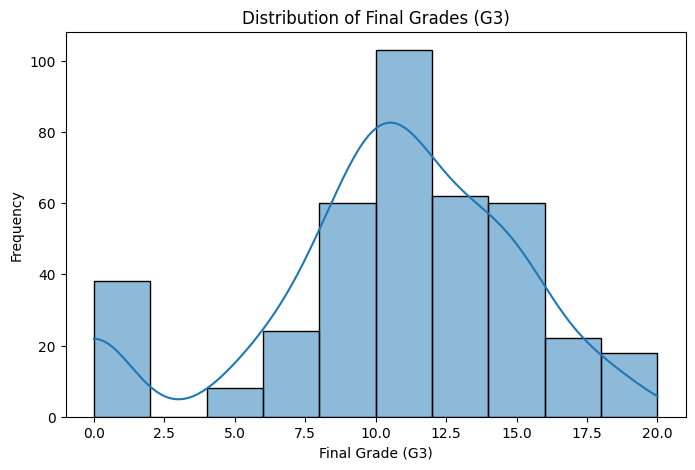

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


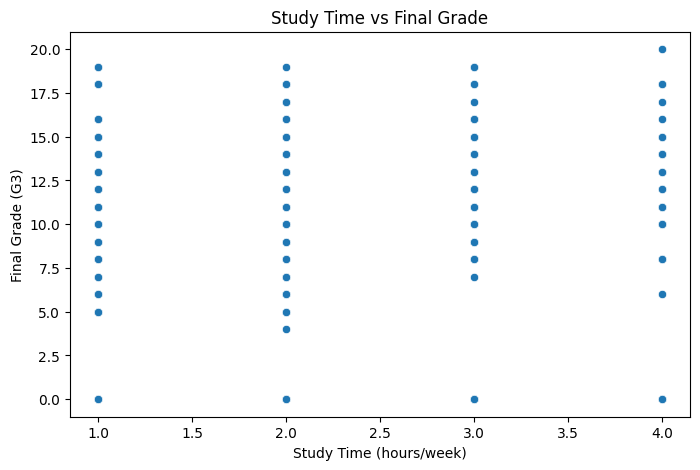

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.show()


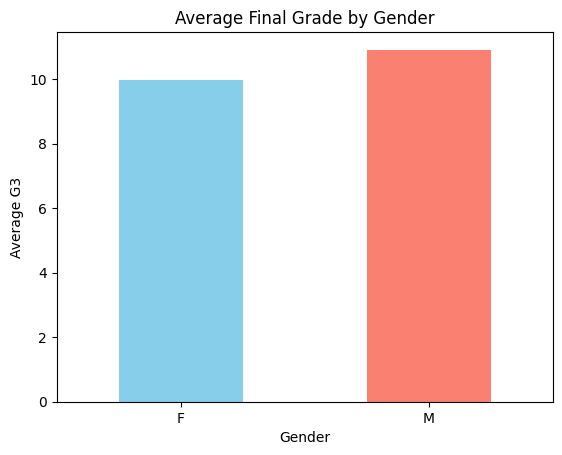

In [10]:
avg_by_sex.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.xticks(rotation=0)
plt.show()
